##### Testing and Finding the most appropriate hyperparameters for bodyfat.csv

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.8.2
Keras version: 2.8.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
columns = df.columns

In [ ]:
df.shape

(252, 15)

In [ ]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
#scaling the dataset 
scale = MinMaxScaler()
scalled = scale.fit_transform(df)

In [ ]:
i = 0
for col in columns:
    df[col] = scalled[:,i]
    i += 1

In [ ]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.665496,0.258947,0.016949,0.146127,0.792746,0.253731,0.242531,0.200762,0.151515,0.294264,0.267081,0.189189,0.356436,0.460432,0.232143
1,0.792801,0.128421,0.000000,0.223789,0.886010,0.368159,0.251318,0.172808,0.218501,0.286783,0.267081,0.290541,0.282178,0.568345,0.428571
2,0.407375,0.532632,0.000000,0.145105,0.761658,0.144279,0.289982,0.235070,0.226475,0.309227,0.366460,0.331081,0.198020,0.302158,0.142857
3,0.703248,0.218947,0.067797,0.270795,0.886010,0.313433,0.395431,0.216010,0.258373,0.321696,0.267081,0.250000,0.376238,0.604317,0.428571
4,0.342406,0.604211,0.033898,0.268751,0.865285,0.164179,0.316344,0.388818,0.269537,0.399002,0.571429,0.331081,0.366337,0.482014,0.339286


In [ ]:
epochs = [10,20,30,40]
lr = [1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
reg = ['l1','l2','None']
act = ['sigmoid','relu']
layers = [1,2,3]

In [ ]:
y = df['BodyFat']
x = df.drop('BodyFat', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
#defining global variables
result_list = []
parameter_list = []
k = 0

In [ ]:
def model_layer1(epochs,lr,act,reg):#reg
  if(reg == 'l1'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=14, name='inputLayer'))
    model.add(tf.keras.layers.Dense(128,activation=act,kernel_regularizer=tf.keras.regularizers.L1(0.01), name='hiddenLayer-1'))
    model.add(tf.keras.layers.Dense(1,name='outputLayer'))
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss = "mse", optimizer = opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])
    history = model.fit(x_train,y_train,epochs=epochs,validation_split=0.15)
    result_list.append(model.evaluate(x_test, y_test))
    print('MODEL EVALUATION: ', model.evaluate(x_test, y_test))
  elif(reg == 'l2'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=14, name='inputLayer'))
    model.add(tf.keras.layers.Dense(128,activation=act,kernel_regularizer=tf.keras.regularizers.L2(0.01), name='hiddenLayer-1'))
    model.add(tf.keras.layers.Dense(1,name='outputLayer'))
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss = "mse", optimizer = opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])
    history = model.fit(x_train,y_train,epochs=epochs,validation_split=0.15)
    result_list.append(model.evaluate(x_test, y_test))
    print('MODEL EVALUATION: ', model.evaluate(x_test, y_test))
  elif(reg == 'None'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=14, name='inputLayer'))
    model.add(tf.keras.layers.Dense(128,activation=act, name='hiddenLayer-1'))
    model.add(tf.keras.layers.Dense(1,name='outputLayer'))
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss = "mse", optimizer = opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])
    history = model.fit(x_train,y_train,epochs=epochs,validation_split=0.15)
    result_list.append(model.evaluate(x_test, y_test))
    print('MODEL EVALUATION: ', model.evaluate(x_test, y_test))
  #acc = history.history['root_mean_squared_error']
  #print(acc)
  #k = k+1
  #result_dict.update({result_dict[k]:acc})
      
  #sns.set_style("darkgrid")
  ##get the details form the history object
  #acc = history.history['root_mean_squared_error']
  #val_acc = history.history['val_root_mean_squared_error']
  #loss = history.history['loss']
  #val_loss = history.history['val_loss']
  #epochs = range(1, len(acc) + 1)
  #plt.figure()
  ##Train and validation loss
  #plt.plot(epochs, loss, 'b', label='Training loss')
  #plt.plot(epochs, val_loss, 'r', label='Validation loss')
  #plt.xlabel('Epoch #')
  #plt.ylabel('loss')
  #plt.title('Training and Validation loss')
  #plt.legend()
  #plt.show()

In [ ]:
def model_layer2(epochs,lr,act,reg):#reg,
  if(reg == 'l1'):
    model1 = tf.keras.Sequential()
    model1.add(tf.keras.layers.InputLayer(input_shape=14, name='inputLayer'))
    model1.add(tf.keras.layers.Dense(128,activation=act,kernel_regularizer=tf.keras.regularizers.L1(0.01), name='hiddenLayer-1'))
    model1.add(tf.keras.layers.Dense(64,activation=act,kernel_regularizer=tf.keras.regularizers.L1(0.01), name='hiddenLayer-2'))
    model1.add(tf.keras.layers.Dense(1,name='outputLayer'))
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model1.compile(loss = "mse", optimizer = opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])
    history = model1.fit(x_train,y_train,epochs=epochs,validation_split=0.15)
    result_list.append(model1.evaluate(x_test, y_test))
    print('MODEL EVALUATION: ', model1.evaluate(x_test, y_test))
  elif(reg == 'l2'):
    model1 = tf.keras.Sequential()
    model1.add(tf.keras.layers.InputLayer(input_shape=14, name='inputLayer'))
    model1.add(tf.keras.layers.Dense(128,activation=act,kernel_regularizer=tf.keras.regularizers.L2(0.01), name='hiddenLayer-1'))
    model1.add(tf.keras.layers.Dense(64,activation=act,kernel_regularizer=tf.keras.regularizers.L2(0.01), name='hiddenLayer-2'))
    model1.add(tf.keras.layers.Dense(1,name='outputLayer'))
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model1.compile(loss = "mse", optimizer = opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])
    history = model1.fit(x_train,y_train,epochs=epochs,validation_split=0.15)
    result_list.append(model1.evaluate(x_test, y_test))
    print('MODEL EVALUATION: ', model1.evaluate(x_test, y_test))
  elif(reg == 'None'):
    model1 = tf.keras.Sequential()
    model1.add(tf.keras.layers.InputLayer(input_shape=14, name='inputLayer'))
    model1.add(tf.keras.layers.Dense(128,activation=act, name='hiddenLayer-1'))
    model1.add(tf.keras.layers.Dense(64,activation=act, name='hiddenLayer-2'))
    model1.add(tf.keras.layers.Dense(1,name='outputLayer'))
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model1.compile(loss = "mse", optimizer = opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])
    history = model1.fit(x_train,y_train,epochs=epochs,validation_split=0.15)
    result_list.append(model1.evaluate(x_test, y_test))
    print('MODEL EVALUATION: ', model1.evaluate(x_test, y_test))

  #print the models    
  #sns.set_style("darkgrid")
  #get the details form the history object
  #acc = history.history['root_mean_squared_error']
  #val_acc = history.history['val_root_mean_squared_error']
  #loss = history.history['loss']
  #val_loss = history.history['val_loss']
  #epochs = range(1, len(acc) + 1)
  #plt.figure()
  ##Train and validation loss
  #plt.plot(epochs, loss, 'b', label='Training loss')
  #plt.plot(epochs, val_loss, 'r', label='Validation loss')
  #plt.xlabel('Epoch #')
  #plt.ylabel('loss')
  #plt.title('Training and Validation loss')
  #plt.legend()
  #plt.show()

In [ ]:
def model_layer3(epochs,lr,act,reg):#reg,
  if(reg == 'l1'):
    model2 = tf.keras.Sequential()
    model2.add(tf.keras.layers.InputLayer(input_shape=14, name='inputLayer'))
    model2.add(tf.keras.layers.Dense(128,activation=act,kernel_regularizer=tf.keras.regularizers.L1(0.01), name='hiddenLayer-1'))
    model2.add(tf.keras.layers.Dense(64,activation=act,kernel_regularizer=tf.keras.regularizers.L1(0.01), name='hiddenLayer-2'))
    model2.add(tf.keras.layers.Dense(32,activation =act,kernel_regularizer=tf.keras.regularizers.L1(0.01), name='hiddenLayer-3'))
    model2.add(tf.keras.layers.Dense(1,name='outputLayer'))
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model2.compile(loss = "mse", optimizer = opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])
    history = model2.fit(x_train,y_train,epochs=epochs,validation_split=0.15)
    result_list.append(model2.evaluate(x_test, y_test))
    print('MODEL EVALUATION: ', model2.evaluate(x_test, y_test))
  elif(reg == 'l2'):
    model2 = tf.keras.Sequential()
    model2.add(tf.keras.layers.InputLayer(input_shape=14,name='inputLayer'))
    model2.add(tf.keras.layers.Dense(128,activation=act,kernel_regularizer=tf.keras.regularizers.L2(0.01), name='hiddenLayer-1'))
    model2.add(tf.keras.layers.Dense(64,activation=act,kernel_regularizer=tf.keras.regularizers.L2(0.01), name='hiddenLayer-2'))
    model2.add(tf.keras.layers.Dense(32,activation =act,kernel_regularizer=tf.keras.regularizers.L2(0.01), name='hiddenLayer-3'))
    model2.add(tf.keras.layers.Dense(1,name='outputLayer'))
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model2.compile(loss = "mse", optimizer = opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])
    history = model2.fit(x_train,y_train,epochs=epochs,validation_split=0.15)
    result_list.append(model2.evaluate(x_test, y_test))
    print('MODEL EVALUATION: ', model2.evaluate(x_test, y_test))
  elif(reg == 'None'):
    model2 = tf.keras.Sequential()
    model2.add(tf.keras.layers.InputLayer(input_shape=14, name='inputLayer'))
    model2.add(tf.keras.layers.Dense(128,activation=act, name='hiddenLayer-1'))
    model2.add(tf.keras.layers.Dense(64,activation=act, name='hiddenLayer-2'))
    model2.add(tf.keras.layers.Dense(32,activation =act, name='hiddenLayer-3'))
    model2.add(tf.keras.layers.Dense(1,name='outputLayer'))
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model2.compile(loss = "mse", optimizer = opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])
    history = model2.fit(x_train,y_train,epochs=epochs,validation_split=0.15)
    result_list.append(model2.evaluate(x_test, y_test))
    print('MODEL EVALUATION: ', model2.evaluate(x_test, y_test))

  ##print the models    
  #sns.set_style("darkgrid")
  ##get the details form the history object
  #acc = history.history['root_mean_squared_error']
  #val_acc = history.history['val_root_mean_squared_error']
  #loss = history.history['loss']
  #val_loss = history.history['val_loss']
  #epochs = range(1, len(acc) + 1)
  #plt.figure()
  ##Train and validation loss
  #plt.plot(epochs, loss, 'b', label='Training loss')
  #plt.plot(epochs, val_loss, 'r', label='Validation loss')
  #plt.xlabel('Epoch #')
  #plt.ylabel('loss')
  #plt.title('Training and Validation loss')
  #plt.legend()
  #plt.show()

In [ ]:
k = 0
for l in layers:
  for i in epochs:
    for j in lr:
      for c in act:
        for r in reg:
          k = k + 1
          if (l == 1):
            model_layer1(i,j, c,r)
            print("Model number: ",k)
            parameter_list.append("Hidden Layes: 1 "+"Number of epochs: "+ str(i) + " learning rate: "+ str(j) + " Activation Function: " + c+ "Regularizer: "+ str(r))
            print("Number of epochs: "+ str(i) + " learning rate: "+ str(j) + " Activation Function: " + c)  
          elif (l == 2):
            model_layer2(i,j, c,r)
            #k = k + 1
            print("Model number: ",k)
            parameter_list.append("Hidden Layers: 2 "+"Number of epochs: "+ str(i) + " learning rate: "+ str(j) + " Activation Function: " + c+" Regulizer: "+ str(r))
            print("Number of epochs: "+ str(i) + " learning rate: "+ str(j)+ " Activation Function: " + c)
          elif (l == 3):
            model_layer3(i,j, c,r)
            #k = k + 1
            parameter_list.append("hidden layers: 3 "+"Number of epochs: "+ str(i) + " learning rate: "+ str(j) + " Activation Function: " + c+" Regularizer: "+ str(r))
            print("Number of epochs: "+ str(i) + " learning rate: "+ str(j)+" Activation Function: " + c)
            print("Model number: ",k)

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 0s 10ms/step - loss: 0.7136 - root_mean_squared_error: 0.1803 - val_loss: 0.6397 - val_root_mean_squared_error: 0.1660
Epoch 29/30
6/6 [==============================] - 0s 15ms/step - loss: 0.6062 - root_mean_squared_error: 0.1810 - val_loss: 0.5465 - val_root_mean_squared_error: 0.1667
Epoch 30/30
2/2 [==============================] - 0s 8ms/step - loss: 0.4632 - root_mean_squared_error: 0.1335
MODEL EVALUATION:  [0.4632444381713867, 0.13347163796424866]
Number of epochs: 30 learning rate: 0.001 Activation Function: relu
Model number:  514
Epoch 1/30
6/6 [==============================] - 1s 57ms/step - loss: 1.6613 - root_mean_squared_error: 0.4332 - val_loss: 1.4539 - val_root_mean_squared_error: 0.1863
Epoch 2/30
6/6 [==============================] - 0s 8ms/step - loss: 1.4139 - root_mean_squared_error: 0.1726 - val_loss: 1.3643 - val_root_mean_squared_error: 0.1869
Epoch 3/30
6/6 [========

In [ ]:
parameter_list

['Hidden Layes: 1 Number of epochs: 10 learning rate: 1 Activation Function: sigmoidRegularizer: l1',
 'Hidden Layes: 1 Number of epochs: 10 learning rate: 1 Activation Function: sigmoidRegularizer: l2',
 'Hidden Layes: 1 Number of epochs: 10 learning rate: 1 Activation Function: sigmoidRegularizer: None',
 'Hidden Layes: 1 Number of epochs: 10 learning rate: 1 Activation Function: reluRegularizer: l1',
 'Hidden Layes: 1 Number of epochs: 10 learning rate: 1 Activation Function: reluRegularizer: l2',
 'Hidden Layes: 1 Number of epochs: 10 learning rate: 1 Activation Function: reluRegularizer: None',
 'Hidden Layes: 1 Number of epochs: 10 learning rate: 0.3 Activation Function: sigmoidRegularizer: l1',
 'Hidden Layes: 1 Number of epochs: 10 learning rate: 0.3 Activation Function: sigmoidRegularizer: l2',
 'Hidden Layes: 1 Number of epochs: 10 learning rate: 0.3 Activation Function: sigmoidRegularizer: None',
 'Hidden Layes: 1 Number of epochs: 10 learning rate: 0.3 Activation Function: 

In [ ]:
result_list

[[59.07469940185547, 0.47266024351119995],
 [3.5590267181396484, 0.1422288417816162],
 [0.2765538692474365, 0.5258839130401611],
 [61.674991607666016, 0.4064732491970062],
 [233.1490020751953, 1.3775484561920166],
 [2.5946145057678223, 1.6107807159423828],
 [14.038047790527344, 0.20870499312877655],
 [1.5320100784301758, 0.3648952543735504],
 [0.04856380447745323, 0.22037196159362793],
 [11.264670372009277, 0.15860983729362488],
 [8.763766288757324, 0.10365648567676544],
 [0.029850339516997337, 0.17277251183986664],
 [0.7528824806213379, 0.23252065479755402],
 [0.18733638525009155, 0.1404411643743515],
 [0.02525193803012371, 0.15890859067440033],
 [0.5168471932411194, 0.08957147598266602],
 [0.48737597465515137, 0.10396230965852737],
 [0.011541446670889854, 0.10743112862110138],
 [0.04934576526284218, 0.1335228979587555],
 [0.016137002035975456, 0.08332689851522446],
 [0.020600011572241783, 0.1435270458459854],
 [0.05579178407788277, 0.10447411239147186],
 [0.0191484447568655, 0.055682

In [ ]:
df_p = pd.DataFrame(parameter_list,columns = ["Parameters"])
df_p.head()

,Parameters
0,Hidden Layes: 1 Number of epochs: 10 learning ...
1,Hidden Layes: 1 Number of epochs: 10 learning ...
2,Hidden Layes: 1 Number of epochs: 10 learning ...
3,Hidden Layes: 1 Number of epochs: 10 learning ...
4,Hidden Layes: 1 Number of epochs: 10 learning ...


In [ ]:
df_r = pd.DataFrame(result_list,columns = ["rmse","v_rmse"])
df_r.head()

,rmse,v_rmse
0,59.074699,0.472660
1,3.559027,0.142229
2,0.276554,0.525884
3,61.674992,0.406473
4,233.149002,1.377548


In [ ]:
df = pd.concat([df_p, df_r], axis=1)
df.head()

,Parameters,rmse,v_rmse
0,Hidden Layes: 1 Number of epochs: 10 learning ...,59.074699,0.472660
1,Hidden Layes: 1 Number of epochs: 10 learning ...,3.559027,0.142229
2,Hidden Layes: 1 Number of epochs: 10 learning ...,0.276554,0.525884
3,Hidden Layes: 1 Number of epochs: 10 learning ...,61.674992,0.406473
4,Hidden Layes: 1 Number of epochs: 10 learning ...,233.149002,1.377548


In [ ]:
df['rmse'].min()

0.0003560284967534244

In [ ]:
print(df[df['rmse'] == df['rmse'].min()])

                                            Parameters      rmse    v_rmse
545  hidden layers: 3 Number of epochs: 40 learning...  0.000356  0.018869


In [ ]:
df['Parameters'].iloc[545]

'hidden layers: 3 Number of epochs: 40 learning rate: 0.1 Activation Function: relu Regularizer: None'

The most optimal paramenters are as follows
hidden layers: 3 Number of epochs: 40 learning rate: 0.1 Activation Function: relu Regularizer: None
Creating a model to visualize the training and validation loss of the above decribed parameters against the epoches.

Epoch 1/40
6/6 [==============================] - 2s 65ms/step - loss: 457.1295 - root_mean_squared_error: 21.3806 - val_loss: 0.1297 - val_root_mean_squared_error: 0.3601
Epoch 2/40
6/6 [==============================] - 0s 15ms/step - loss: 0.0659 - root_mean_squared_error: 0.2567 - val_loss: 0.0512 - val_root_mean_squared_error: 0.2263
Epoch 3/40
6/6 [==============================] - 0s 10ms/step - loss: 0.0337 - root_mean_squared_error: 0.1836 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1890
Epoch 4/40
6/6 [==============================] - 0s 12ms/step - loss: 0.0313 - root_mean_squared_error: 0.1770 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1248
Epoch 5/40
6/6 [==============================] - 0s 21ms/step - loss: 0.0233 - root_mean_squared_error: 0.1526 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1527
Epoch 6/40
6/6 [==============================] - 0s 11ms/step - loss: 0.0219 - root_mean_squared_error: 0.1480 - val_loss: 0.0140 - val_root_mean_squar

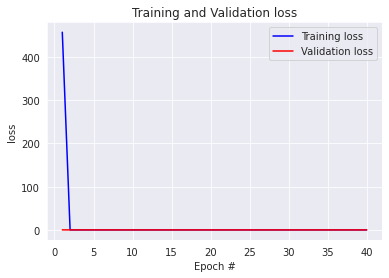

In [ ]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.InputLayer(input_shape=14, name='inputLayer'))
model3.add(tf.keras.layers.Dense(128,activation='relu', name='hiddenLayer-1'))
model3.add(tf.keras.layers.Dense(64,activation='relu', name='hiddenLayer-2'))
model3.add(tf.keras.layers.Dense(32,activation ='relu', name='hiddenLayer-3'))
model3.add(tf.keras.layers.Dense(1,name='outputLayer'))
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model3.compile(loss = "mse", optimizer = opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])
history = model3.fit(x_train,y_train,epochs=40,validation_split=0.15)
#result_list.append(model3.evaluate(x_test, y_test))
print('MODEL EVALUATION: ', model3.evaluate(x_test, y_test))

#print the models    
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['root_mean_squared_error']
val_acc = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

#### Hence the most optimal hyper parameters are as follows

#### Hidden layers: 3 Number of epochs: 40 learning rate: 0.1 Activation Function: relu Regularizer: None

##### Above we have also plotted the graphy regarding the training and validation loss for the most optimal hyperparameters